<a href="https://colab.research.google.com/github/Jawad1347/class_tests/blob/main/covidPrediction_classwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
url = "https://drive.google.com/a/itu.edu.pk/uc?id=1-HQQciKYfwAO3oH7ci6zhg45DduvkpnK"

In [ ]:
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D
from keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense, AvgPool2D,MaxPool2D
from keras.models import Sequential, Model
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.optimizers import Adam, SGD, RMSprop

import tensorflow as tf

import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
!unzip archive.zip
# os.listdir()

In [ ]:
DATASET_DIR = "dataset"
os.listdir(DATASET_DIR)

['normal', 'covid']

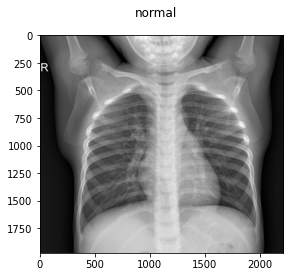

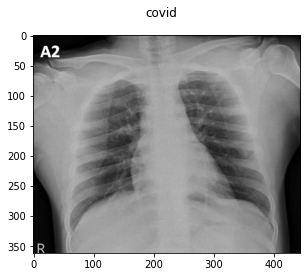

In [ ]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

normal_images = []
for img_path in glob.glob(DATASET_DIR + '/normal/*'):
    normal_images.append(mpimg.imread(img_path))

fig = plt.figure()
fig.suptitle('normal')
plt.imshow(normal_images[0], cmap='gray') 

covid_images = []
for img_path in glob.glob(DATASET_DIR + '/covid/*'):
    covid_images.append(mpimg.imread(img_path))

fig = plt.figure()
fig.suptitle('covid')
plt.imshow(covid_images[0], cmap='gray')

In [ ]:
print(len(normal_images))
print(len(covid_images))

28
70


In [ ]:
size = 150

INPUT_SHAPE = (size, size, 3)
# NB_CLASSES = 2
EPOCHS = 33
BATCH_SIZE = 6

## Model Building

In [ ]:
# model 1
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=INPUT_SHAPE))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(Conv2D(250,(3,3)))
model.add(Activation("relu"))
  
model.add(Conv2D(128,(3,3)))
model.add(Activation("relu"))
model.add(AvgPool2D(2,2))
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(AvgPool2D(2,2))

model.add(Conv2D(256,(2,2)))
model.add(Activation("relu"))
model.add(MaxPool2D(2,2))
    
model.add(Flatten())
model.add(Dense(32))
model.add(Dropout(0.25))
model.add(Dense(1))
model.add(Activation("sigmoid"))

# make or compile the model
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# look at the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_8 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_9 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 34, 34, 64)       

## Data Augumentation

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.3)

train_generator = train_datagen.flow_from_directory(
    DATASET_DIR,
    target_size=(size, size),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    DATASET_DIR, 
    target_size=(size, size),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle= False,
    subset='validation')

Found 69 images belonging to 2 classes.
Found 29 images belonging to 2 classes.


In [ ]:
# lambda networks

In [ ]:
# moment of truth

history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // BATCH_SIZE,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // BATCH_SIZE,
    epochs = EPOCHS)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/33
11/11 [==============================] - 9s 719ms/step - loss: 1.7117 - accuracy: 0.6272 - val_loss: 0.4943 - val_accuracy: 0.8750
Epoch 2/33
11/11 [==============================] - 7s 696ms/step - loss: 0.6558 - accuracy: 0.6706 - val_loss: 0.3924 - val_accuracy: 0.8750
Epoch 3/33
11/11 [==============================] - 7s 671ms/step - loss: 0.5367 - accuracy: 0.8299 - val_loss: 0.5292 - val_accuracy: 0.8750
Epoch 4/33
11/11 [==============================] - 7s 683ms/step - loss: 0.6501 - accuracy: 0.6590 - val_loss: 0.4054 - val_accuracy: 0.8750
Epoch 5/33
11/11 [==============================] - 8s 666ms/step - loss: 0.6893 - accuracy: 0.6813 - val_loss: 0.5211 - val_accuracy: 0.8750
Epoch 6/33
11/11 [==============================] - 7s 675ms/step - loss: 0.7082 - accuracy: 0.7475 - val_loss: 0.5933 - val_accuracy: 0.8750
Epoch 7/33
11/11 [==============================] - 7s 676ms/step - loss: 0.6032 - accuracy: 0.7602 - val_loss: 0.5253 - val_accuracy: 0.8750
Epoch 

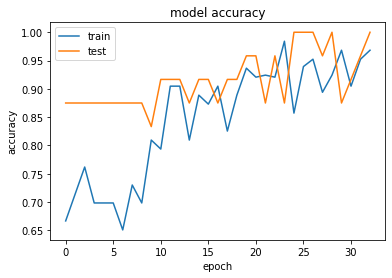

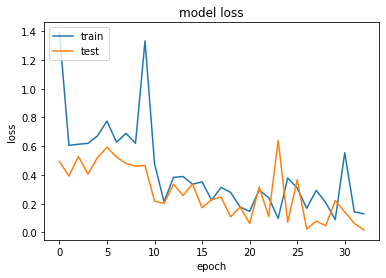

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
print("training_accuracy", history.history['accuracy'][-1])
print("validation_accuracy", history.history['val_accuracy'][-1])

training_accuracy 0.9682539701461792
validation_accuracy 1.0


Epoch 1/5
200/200 [==============================] - 1s 1ms/step - loss: 0.5799 - accuracy: 0.6738
Epoch 2/5
200/200 [==============================] - 0s 1ms/step - loss: 0.2491 - accuracy: 0.8954
Epoch 3/5
200/200 [==============================] - 0s 1ms/step - loss: 0.2328 - accuracy: 0.9022
Epoch 4/5
200/200 [==============================] - 0s 1ms/step - loss: 0.2276 - accuracy: 0.9054
Epoch 5/5
200/200 [==============================] - 0s 1ms/step - loss: 0.2202 - accuracy: 0.9104


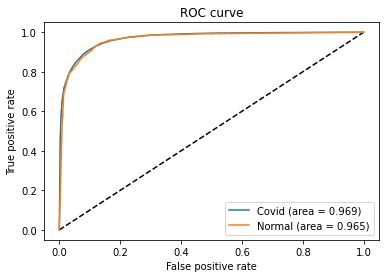

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples=80000)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

X_train, X_train_lr, y_train, y_train_lr = train_test_split(X_train,
                                                            y_train,
                                                            test_size=0.5)
from keras.models import Sequential
from keras.layers import Dense

def build_model():
    model = Sequential()
    model.add(Dense(20, input_dim=20, activation='relu'))
    model.add(Dense(40, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
import matplotlib.pyplot as plt
from keras.wrappers.scikit_learn import KerasClassifier
keras_model = build_model()
keras_model.fit(X_train, y_train, epochs=5, batch_size=100, verbose=1)
from sklearn.metrics import roc_curve
y_pred_keras = keras_model.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)
from sklearn.ensemble import RandomForestClassifier
# Supervised transformation based on random forests
# rf = RandomForestClassifier(max_depth=3, n_estimators=10) # acc 92.34%
# rf = RandomForestClassifier(max_depth=3, n_estimators=100) # acc 90.96%
# rf = RandomForestClassifier(max_depth=5, n_estimators=10) # acc 90.70% ROC = 96.3% almost for both
# rf = RandomForestClassifier(max_depth=5, n_estimators=100) # acc 91.55%
rf = RandomForestClassifier(max_depth=3, n_estimators=10) # acc 91.04% second run
rf.fit(X_train, y_train)

y_pred_rf = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_rf)
auc_rf = auc(fpr_rf, tpr_rf)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Covid (area = {:.3f})'.format(auc_keras))
plt.plot(fpr_rf, tpr_rf, label='Normal (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()